In [31]:
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
import fiona
from shapely.geometry import Polygon, MultiPolygon, MultiLineString, shape, MultiPoint
from pprint import pprint


# we can inspect the shapefile of the metro stops in vienna
for point in fiona.open('UBAHN/UBAHNHALTOGDPoint.shp'):
    pprint(point)

{'geometry': {'coordinates': (16.313438744509632, 48.13688046529018),
              'type': 'Point'},
 'id': '0',
 'properties': OrderedDict([(u'OBJECTID', 4588.0), (u'LINFO', 6.0), (u'HSTNR', None), (u'HTXT', u'Perfektastra\xdfe'), (u'HBEM', None), (u'EROEFFNUNG', 1995.0), (u'EROEFFNUN0', 4.0)]),
 'type': 'Feature'}
{'geometry': {'coordinates': (16.295795071712917, 48.18940650800911),
              'type': 'Point'},
 'id': '1',
 'properties': OrderedDict([(u'OBJECTID', 4589.0), (u'LINFO', 4.0), (u'HSTNR', None), (u'HTXT', u'Braunschweiggasse'), (u'HBEM', None), (u'EROEFFNUNG', 1981.0), (u'EROEFFNUN0', 12.0)]),
 'type': 'Feature'}
{'geometry': {'coordinates': (16.34426831976529, 48.22127508635545),
              'type': 'Point'},
 'id': '2',
 'properties': OrderedDict([(u'OBJECTID', 4590.0), (u'LINFO', 6.0), (u'HSTNR', None), (u'HTXT', u'Michelbeuern-AKH'), (u'HBEM', None), (u'EROEFFNUNG', 1989.0), (u'EROEFFNUN0', 10.0)]),
 'type': 'Feature'}
{'geometry': {'coordinates': (16.4113510961

In [2]:
# We can extract the stops for each metro line by filtering for the LINFO property

linestops = {}
for line in[1.0, 2.0, 3.0, 4.0, 6.0]:
    linestops[line] = MultiPoint(
                    [shape(point['geometry']) for point in fiona.open('UBAHN/UBAHNHALTOGDPoint.shp')
                    if point['properties']['LINFO'] == line])
 
pprint(linestops)

{1.0: <shapely.geometry.multipoint.MultiPoint object at 0x7f84b88e32d0>,
 2.0: <shapely.geometry.multipoint.MultiPoint object at 0x7f84b88e3210>,
 3.0: <shapely.geometry.multipoint.MultiPoint object at 0x7f84b88e3410>,
 4.0: <shapely.geometry.multipoint.MultiPoint object at 0x7f84b88e3250>,
 6.0: <shapely.geometry.multipoint.MultiPoint object at 0x7f84b88e3590>}


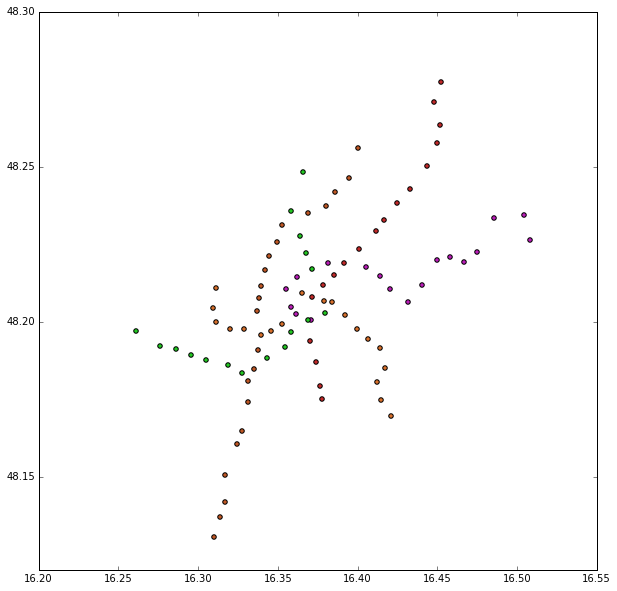

In [3]:
%matplotlib inline
# line colors
lcolors = {1.0: "#c32929",
           2.0: "#bc1dba",
           3.0: "#d9712c",
           4.0: "#23c923",
           6.0: "#c15825"}
# plot the stops
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for line in linestops:
    xs = []
    ys = []
    for point in linestops[line]:
        x, y = point.xy
        xs.append(x)
        ys.append(y)
    
    ax.scatter(xs,ys,c=lcolors[line])
        
plt.show()

In [4]:
# we can inspect the shapefile of the metro lines in vienna
for line in fiona.open('UBAHN/UBAHNOGDLine.shp'):
    pprint(line)

{'geometry': {'coordinates': [(16.3685486650829, 48.23520989049319),
                              (16.37508786254434, 48.235302183495605),
                              (16.375591622805878, 48.23530510050114),
                              (16.375773781028673, 48.23532451864201),
                              (16.375925716803348, 48.23534713954208),
                              (16.376072335929585, 48.23537904120818),
                              (16.376511522782174, 48.23553634918887),
                              (16.377128124521395, 48.2358156299686),
                              (16.377994400378146, 48.23622867940986),
                              (16.380122184157734, 48.23724949887222)],
              'type': 'LineString'},
 'id': '0',
 'properties': OrderedDict([(u'OBJECTID', 2649.0), (u'LINFO', 6.0), (u'EROEFFNUNG', None), (u'EROEFFNUN0', None)]),
 'type': 'Feature'}
{'geometry': {'coordinates': [(16.327562024265983, 48.18364117545797),
                              (16.32

In [5]:
lines = {}
for line in[1, 2, 3, 4, 6]:
    lines[line] = MultiLineString(
                    [shape(ml['geometry']) for ml in fiona.open('UBAHN/UBAHNOGDLine.shp')
                    if int(ml['properties']['LINFO']) == line])
 
pprint(lines)

{1: <shapely.geometry.multilinestring.MultiLineString object at 0x7f84b88e3690>,
 2: <shapely.geometry.multilinestring.MultiLineString object at 0x7f84b88e3550>,
 3: <shapely.geometry.multilinestring.MultiLineString object at 0x7f84b7c554d0>,
 4: <shapely.geometry.multilinestring.MultiLineString object at 0x7f84b7c55450>,
 6: <shapely.geometry.multilinestring.MultiLineString object at 0x7f84b86341d0>}


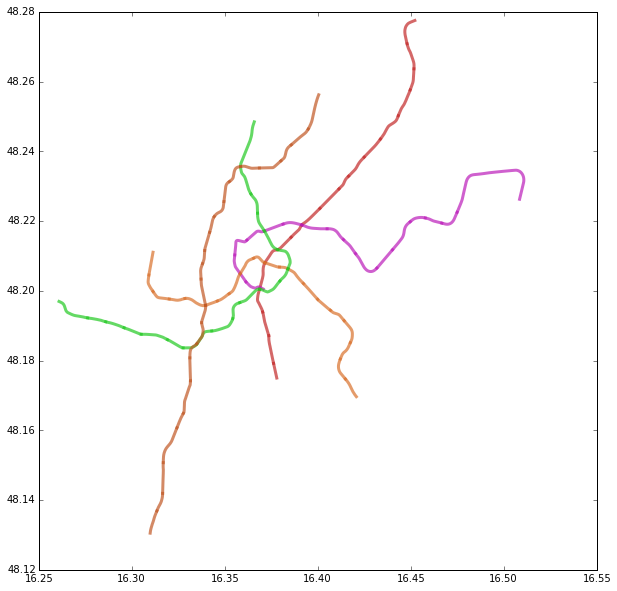

In [25]:
# plot the stops
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
for line in lines:
    for ml in lines[line]:
        x, y = ml.xy
        ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7)
        
plt.show()
    

In [7]:
# Districts

# we can inspect the shapefile of the districts
for district in fiona.open('Bezirke/BEZIRKSGRENZEOGDPolygon.shp'):
    print district['properties']

OrderedDict([(u'NAMEK', u'Landstra\xdfe'), (u'BEZNR', 3.0), (u'BEZ_RZ', u'III'), (u'NAMEK_NUM', u'3., Landstra\xdfe'), (u'NAMEK_RZ', u'III. Landstra\xdfe'), (u'NAMEG', u'LANDSTRASSE'), (u'LABEL', u'III.'), (u'BEZ', u'03'), (u'DISTRICT_C', 1030.0), (u'STATAUSTRI', 903.0), (u'STATAUSTR0', 90301.0), (u'FLAECHE', 7397707.7514), (u'UMFANG', 13969.84), (u'AKT_TIMEST', '2015-05-29'), (u'SE_SDO_ROW', 5762.0)])
OrderedDict([(u'NAMEK', u'Josefstadt'), (u'BEZNR', 8.0), (u'BEZ_RZ', u'VIII'), (u'NAMEK_NUM', u'8., Josefstadt'), (u'NAMEK_RZ', u'VIII. Josefstadt'), (u'NAMEG', u'JOSEFSTADT'), (u'LABEL', u'VIII.'), (u'BEZ', u'08'), (u'DISTRICT_C', 1080.0), (u'STATAUSTRI', 908.0), (u'STATAUSTR0', 90801.0), (u'FLAECHE', 1089945.7227), (u'UMFANG', 4170.3), (u'AKT_TIMEST', '2015-05-29'), (u'SE_SDO_ROW', 5763.0)])
OrderedDict([(u'NAMEK', u'Innere Stadt'), (u'BEZNR', 1.0), (u'BEZ_RZ', u'I'), (u'NAMEK_NUM', u'1., Innere Stadt'), (u'NAMEK_RZ', u'I. Innere Stadt'), (u'NAMEG', u'INNERE STADT'), (u'LABEL', u'I.'),

In [8]:
# Districts
districts = {}
# load each district into a Polygon
for district in fiona.open('Bezirke/BEZIRKSGRENZEOGDPolygon.shp'):
    districts[int(district['properties']['BEZNR'])] = Polygon(shape(district['geometry']))

pprint(districts)

{1: <shapely.geometry.polygon.Polygon object at 0x7f84b88d1b50>,
 2: <shapely.geometry.polygon.Polygon object at 0x7f84b88e31d0>,
 3: <shapely.geometry.polygon.Polygon object at 0x7f84b88d1ed0>,
 4: <shapely.geometry.polygon.Polygon object at 0x7f84b849bd50>,
 5: <shapely.geometry.polygon.Polygon object at 0x7f84b849b4d0>,
 6: <shapely.geometry.polygon.Polygon object at 0x7f84b8492cd0>,
 7: <shapely.geometry.polygon.Polygon object at 0x7f84b8492b90>,
 8: <shapely.geometry.polygon.Polygon object at 0x7f84b88e38d0>,
 9: <shapely.geometry.polygon.Polygon object at 0x7f84b88e3610>,
 10: <shapely.geometry.polygon.Polygon object at 0x7f84b849b610>,
 11: <shapely.geometry.polygon.Polygon object at 0x7f84b849b310>,
 12: <shapely.geometry.polygon.Polygon object at 0x7f84b849bd10>,
 13: <shapely.geometry.polygon.Polygon object at 0x7f84b8492b50>,
 14: <shapely.geometry.polygon.Polygon object at 0x7f84b849bb90>,
 15: <shapely.geometry.polygon.Polygon object at 0x7f84b8492e90>,
 16: <shapely.geome

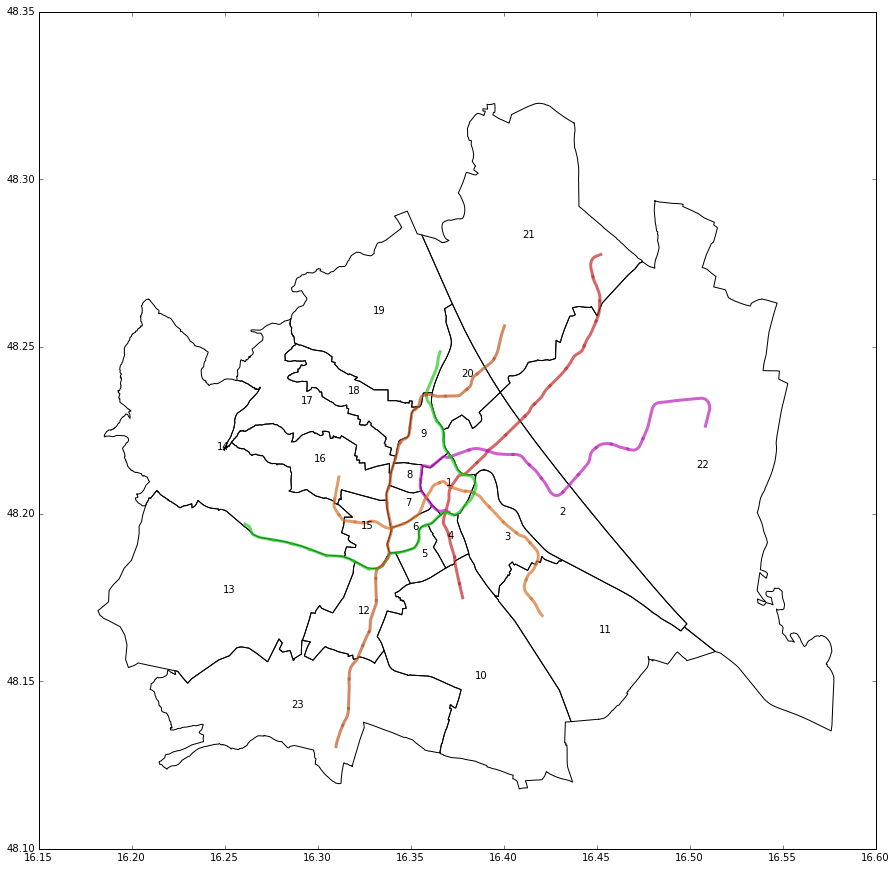

In [9]:
# plot the districts as a background
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for nr in districts:
    x, y = districts[nr].exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
    xcent, ycent = districts[nr].exterior.centroid.xy
    ax.text(xcent[0],ycent[0], nr)
        
for line in lines:
    for ml in lines[line]:
        x, y = ml.xy
        ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7, zorder=2)
plt.show()

In [10]:
# find out through which districts the U3 goes

crosses = []
u3 = lines[3]
for nr in districts:
    if u3.crosses(districts[nr]):
       crosses.append(nr)

print(crosses)
    

[1, 3, 6, 7, 11, 14, 15, 16]


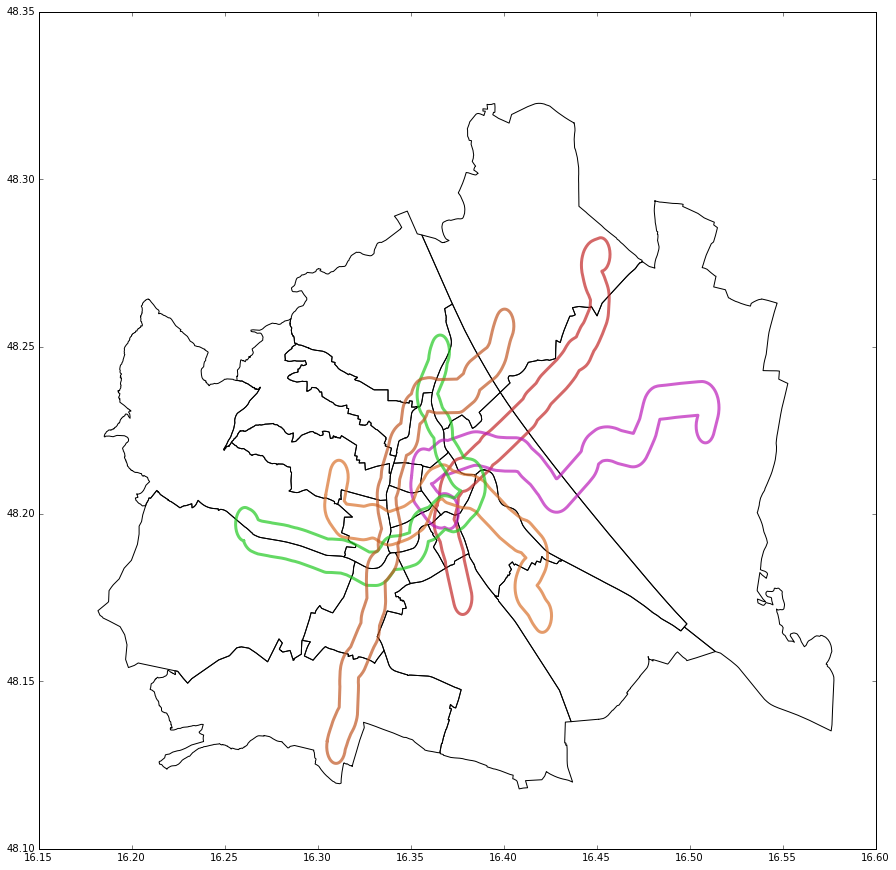

In [11]:
# imagine you are afraid of metro lines and don't want a flat
# near one.
# create a buffer around the metro lines

buffered_lines = {}

# our data is in lon, lat so buffers are also in lon, lat
# 0.001 degree is approx 100m (differs in longitude and latitude)
# ideally we would reproject our dataset before doing serious GIS
# operations
for line in lines:
    buffered_lines[line] = lines[line].buffer(0.001*5)

fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
for nr in districts:
    x, y = districts[nr].exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
        
for line in buffered_lines:
    x, y = buffered_lines[line].exterior.xy
    ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7, zorder=2)
plt.show()

# Projecting data

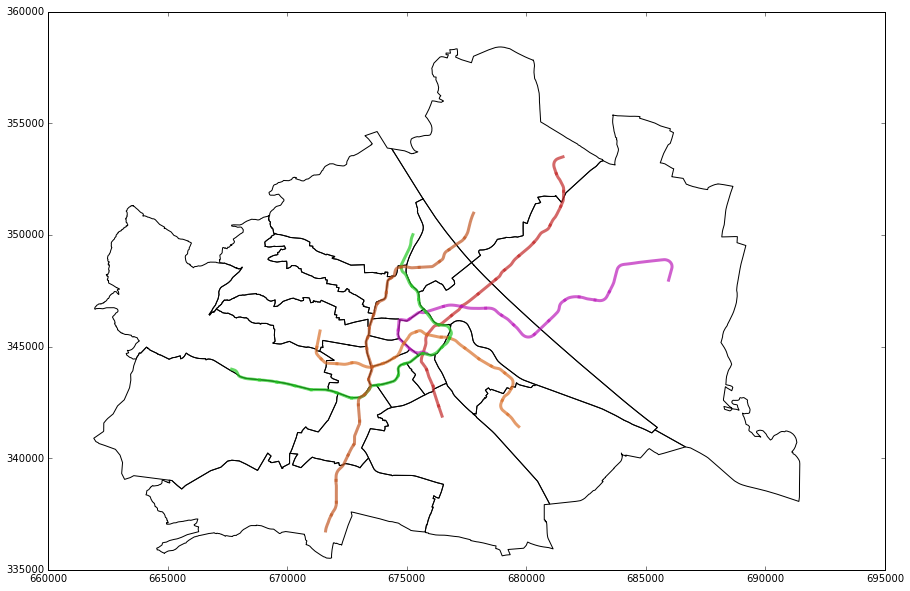

In [27]:
# get the projection of the data
bez = fiona.open('Bezirke/BEZIRKSGRENZEOGDPolygon.shp')
bez.crs

from functools import partial
import pyproj
from shapely.ops import transform

project = partial(
    pyproj.transform,
    pyproj.Proj(init='epsg:4326'),
    pyproj.Proj(init='epsg:31258'))

districts_proj = {}
for nr in districts:
    districts_proj[nr] = transform(project, districts[nr])

lines_proj = {}
for line in lines:
    lines_proj[line] = transform(project, lines[line])
    
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for nr in districts_proj:
    x, y = districts_proj[nr].exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
    
for line in lines_proj:
    for ml in lines_proj[line]:
        x, y = ml.xy
        ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7, zorder=2)

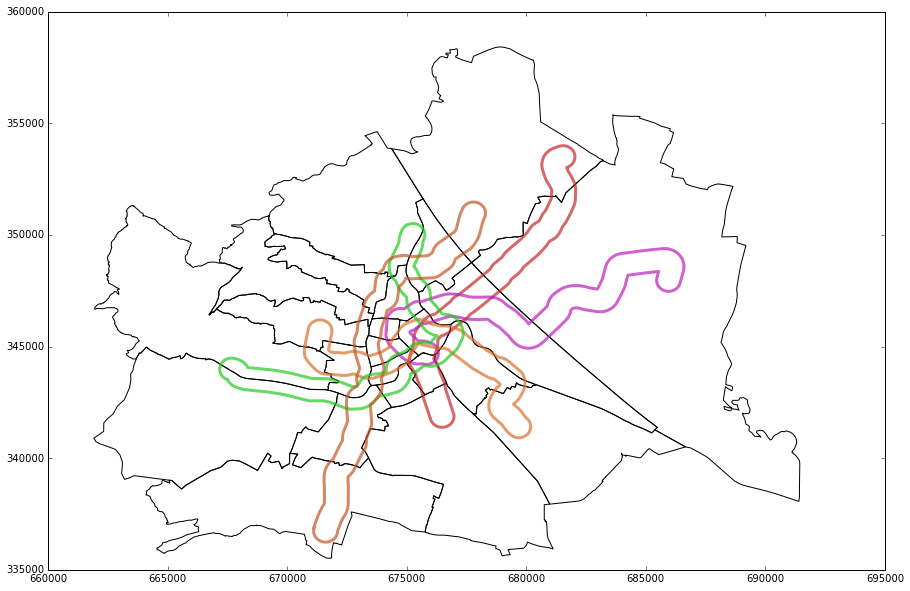

In [29]:
# now we can do it properly

buffered_lines_proj = {}

for line in lines_proj:
    buffered_lines_proj[line] = lines_proj[line].buffer(500)

fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for nr in districts_proj:
    x, y = districts_proj[nr].exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
        
for line in buffered_lines_proj:
    x, y = buffered_lines_proj[line].exterior.xy
    ax.plot(x,y,color=lcolors[line], linewidth=3, alpha=0.7, zorder=2)
plt.show()

In [59]:
# we can now substract the buffered lines from the district polygons
# first we make a union to avoid self intersection of polygons
from shapely.ops import cascaded_union
all_buffered_lines = cascaded_union(buffered_lines_proj.values())
all_districts = cascaded_union(districts_proj.values())
ok_to_live = all_districts.difference(all_buffered_lines)

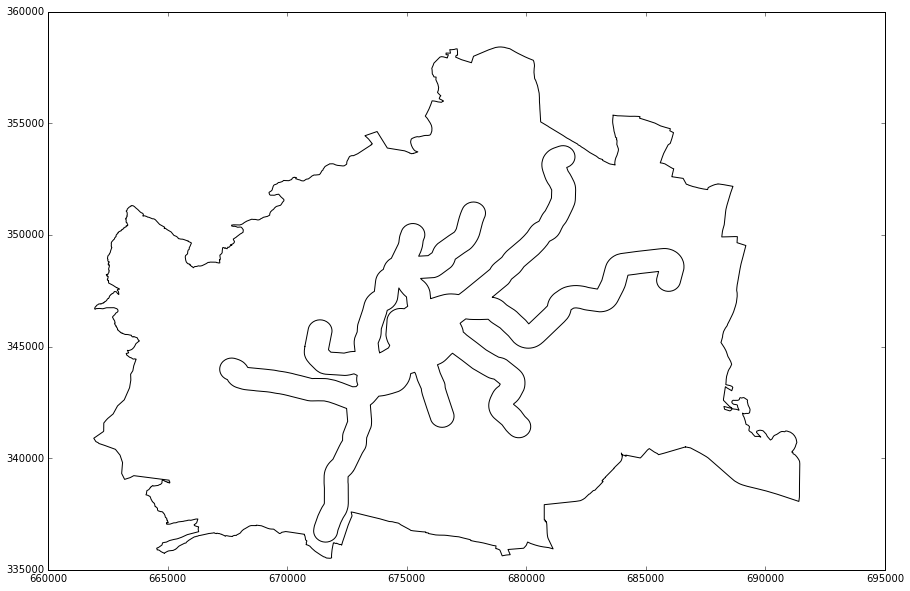

In [60]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for poly in ok_to_live:
    x, y = poly.exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
    for interior in poly.interiors:
        x, y = interior.xy
        ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)

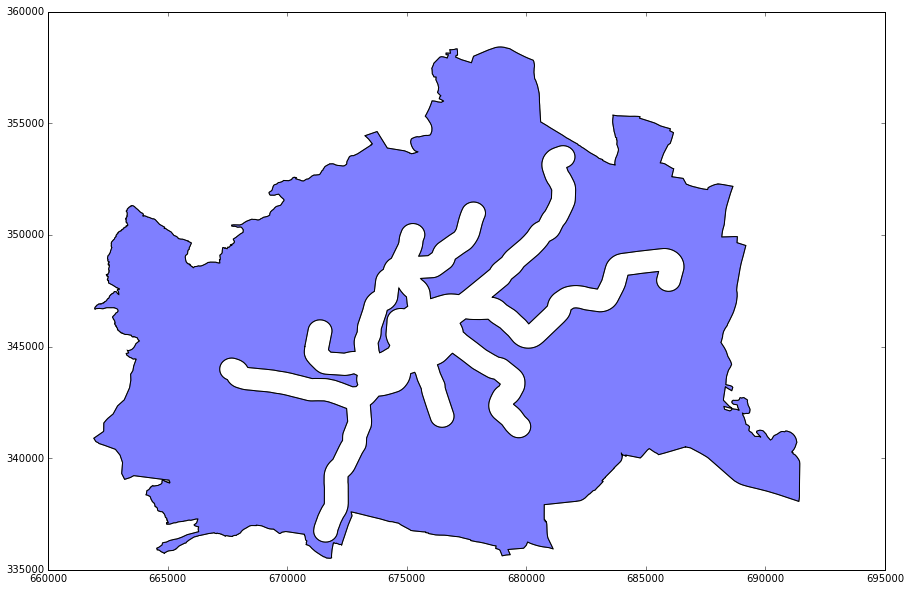

In [58]:
from descartes.patch import PolygonPatch



fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111)
for poly in ok_to_live:
    x, y = poly.exterior.xy
    ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)
    for interior in poly.interiors:
        x, y = interior.xy
        ax.plot(x,y, color="#000000", linewidth=1, alpha=1, zorder=1)

for poly in ok_to_live:
    patch = PolygonPatch(poly, facecolor='b', alpha=0.5)
    ax.add_patch(patch)
plt.show()

# Exercise 

count the number of metro stations in each district

# Some other ideas (if you want to try something at home)

- Make an animation showing the history of the Vienna metro.
  You can use the 'EROEFFNUNG' and 'EROEFFNUN0' attributes of the point shape file.

- Download the data for all the trams and/or S-Bahn and add them to the map.